<a href="https://colab.research.google.com/github/sky16k/MDS/blob/main/MDS06_HW_%D0%A9%D0%B5%D0%B4%D1%80%D0%B8%D0%BD%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Домашнее задание "Теория оптимизации".

### Задание

В данном задании нужно поэксперементировать с оптимизацией функций с помощью библиотеки [scipy](https://docs.scipy.org/doc/scipy/index.html).

Попробуем найти оптимальные параметры (начальные `p0` и метод `method`) некоторой функции f, которая описывает зависимость между x и y. 
Для этой цели будем использовать [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). Цель – найти такие параметры, при которых функция будет повторять исходную.

При заданных парах <x, y> если у нас есть представление о виде функции, которая сопоставляет x -> y, но мы знаем только общий вид функции за исключением параметров, curve_fit позволит найти эти параметры.

In [25]:
import matplotlib.pyplot as plt
import numpy as np
import scipy
import pandas as pd

%matplotlib inline

from scipy.optimize import curve_fit

In [26]:
x = np.linspace(1, 7, 300)
y = [ 31.11,  30.55,  29.95,  29.3 ,  28.6 ,  27.86,  27.08,  26.25,
        25.38,  24.48,  23.54,  22.56,  21.54,  20.5 ,  19.42,  18.32,
        17.18,  16.02,  14.84,  13.64,  12.41,  11.17,   9.91,   8.64,
         7.36,   6.07,   4.77,   3.46,   2.15,   0.84,  -0.46,  -1.77,
        -3.07,  -4.36,  -5.64,  -6.91,  -8.17,  -9.41, -10.63, -11.83,
       -13.01, -14.17, -15.3 , -16.4 , -17.47, -18.52, -19.53, -20.5 ,
       -21.44, -22.34, -23.2 , -24.02, -24.8 , -25.54, -26.23, -26.88,
       -27.48, -28.03, -28.53, -28.99, -29.39, -29.74, -30.04, -30.29,
       -30.49, -30.63, -30.72, -30.76, -30.75, -30.68, -30.56, -30.38,
       -30.15, -29.87, -29.54, -29.15, -28.72, -28.23, -27.7 , -27.11,
       -26.48, -25.8 , -25.08, -24.31, -23.5 , -22.64, -21.75, -20.81,
       -19.84, -18.83, -17.79, -16.71, -15.6 , -14.46, -13.3 , -12.11,
       -10.89,  -9.65,  -8.39,  -7.11,  -5.82,  -4.51,  -3.19,  -1.86,
        -0.52,   0.82,   2.17,   3.52,   4.86,   6.21,   7.55,   8.88,
        10.21,  11.52,  12.82,  14.11,  15.37,  16.62,  17.85,  19.05,
        20.23,  21.38,  22.5 ,  23.6 ,  24.65,  25.68,  26.67,  27.62,
        28.53,  29.41,  30.24,  31.03,  31.77,  32.47,  33.12,  33.73,
        34.28,  34.79,  35.25,  35.66,  36.01,  36.32,  36.57,  36.77,
        36.91,  37.01,  37.04,  37.03,  36.96,  36.84,  36.67,  36.44,
        36.17,  35.84,  35.46,  35.02,  34.54,  34.01,  33.43,  32.81,
        32.14,  31.42,  30.66,  29.86,  29.01,  28.13,  27.21,  26.25,
        25.25,  24.23,  23.17,  22.08,  20.96,  19.81,  18.64,  17.45,
        16.24,  15.  ,  13.75,  12.49,  11.21,   9.93,   8.63,   7.33,
         6.02,   4.71,   3.4 ,   2.1 ,   0.8 ,  -0.5 ,  -1.79,  -3.06,
        -4.33,  -5.58,  -6.81,  -8.02,  -9.22, -10.39, -11.53, -12.65,
       -13.74, -14.8 , -15.83, -16.82, -17.78, -18.7 , -19.59, -20.43,
       -21.23, -21.99, -22.71, -23.38, -24.01, -24.59, -25.12, -25.6 ,
       -26.03, -26.41, -26.74, -27.02, -27.24, -27.42, -27.54, -27.61,
       -27.62, -27.58, -27.49, -27.34, -27.14, -26.89, -26.59, -26.23,
       -25.83, -25.37, -24.86, -24.3 , -23.7 , -23.05, -22.35, -21.6 ,
       -20.81, -19.98, -19.11, -18.2 , -17.24, -16.26, -15.23, -14.17,
       -13.08, -11.96, -10.81,  -9.63,  -8.43,  -7.2 ,  -5.95,  -4.68,
        -3.4 ,  -2.1 ,  -0.79,   0.54,   1.87,   3.21,   4.56,   5.91,
         7.26,   8.6 ,   9.95,  11.29,  12.62,  13.94,  15.24,  16.54,
        17.81,  19.07,  20.31,  21.53,  22.72,  23.89,  25.03,  26.13,
        27.21,  28.26,  29.26,  30.24,  31.17,  32.07,  32.92,  33.73,
        34.5 ,  35.23,  35.91,  36.54,  37.12,  37.66,  38.14,  38.58,
        38.96,  39.3 ,  39.58,  39.8 ]

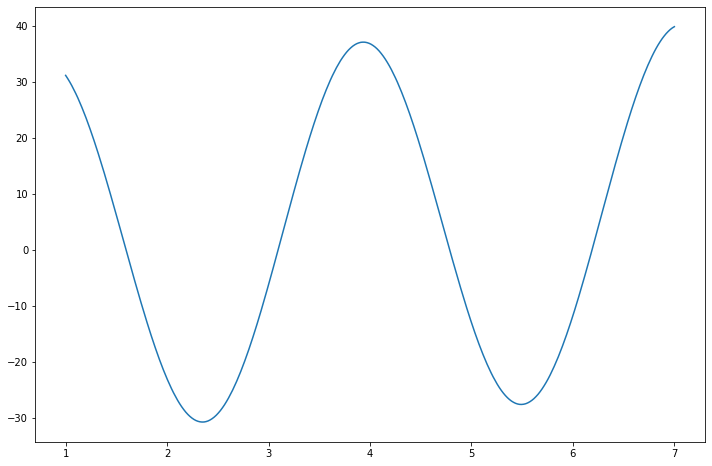

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(x, y)
plt.show()

In [42]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x


(array([0.       , 0.8712304]), array([[3.22327034, 0.12705255],
        [0.12705255, 0.20032495]]))

In [ ]:

### YOUR CODE HERE
res = curve_fit(f,x,y, bounds=(0, np.inf), method = 'dogbox')
res

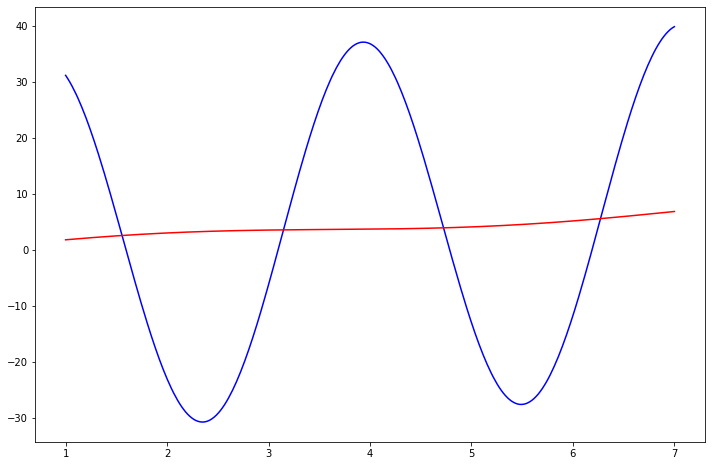

In [43]:
plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
plt.show()

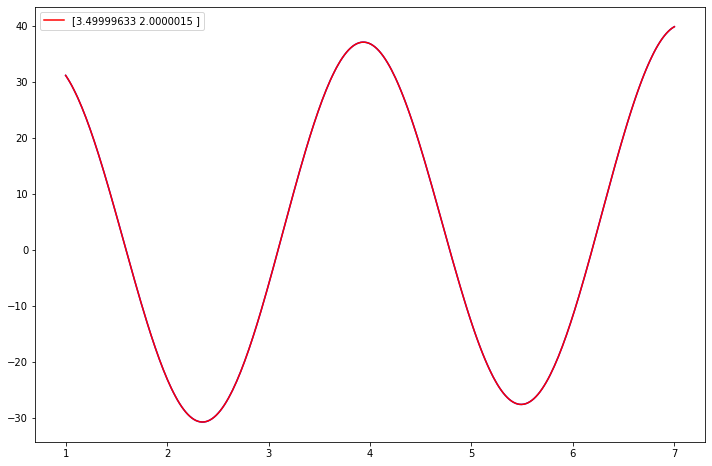

оптимальные параметры : [3.5 2. ]
31


In [162]:
from numpy.random import randint
res_arr = np.array([])
qtf_sq = 1000

for i in range(100):
    p_ = randint(0, 10 + 1,2)
    p0=p_
    res = curve_fit(f,x,y, p0=p0, full_output = True)
    # print('p0 : ',p_)
    # print('0',res[0])
    # print('1',res[1])
    # # for i,(key,value) in enumerate(res[2].items()):
    # #     print(f'2-{i}',key,':',value)
    # print('2-1 nfev : ',res[2]['nfev'])
    # print('2-3 ipvt : ',res[2]['ipvt'])
    # print('2-4 qtf : ',res[2]['qtf'])
    # print('3',res[3])
    # print('4',res[4])

    qtf = res[2]['qtf']

    if qtf[0]**2+qtf[1]**2 < qtf_sq:
        res_best = res
        qtf_sq = qtf[0]**2+qtf[1]**2
        # print(res[0])
        # print('*********************************************')
    # plt.figure(figsize=(12, 8))
    # plt.plot(x, y, color='blue')
    # plt.plot(x, f(x, res[0][0], res[0][1]),color='red',label=f'{res[0]},{p_}')
    # plt.legend()
    # plt.show()

plt.figure(figsize=(12, 8))
plt.plot(x, y, color='blue')
plt.plot(x, f(x, res_best[0][0], res_best[0][1]),color='red',label=f'{res_best[0]}')
plt.legend()
plt.show()

print('оптимальные параметры :',res_best[0].round(2))
print(res_best[2]['nfev'])

Оптимальные параметры найдены

In [83]:
scipy.__version__
# Out[96]: '0.12.0'

'1.7.3'

trf
[0.75874266 7.5950364 ]


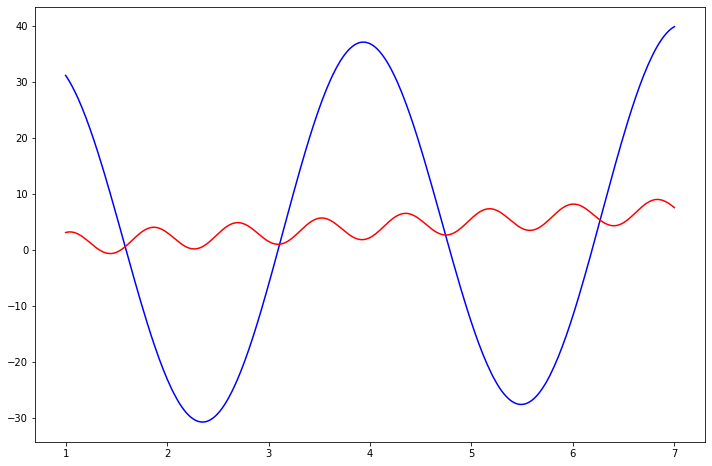

dogbox
[0.         4.03611111]


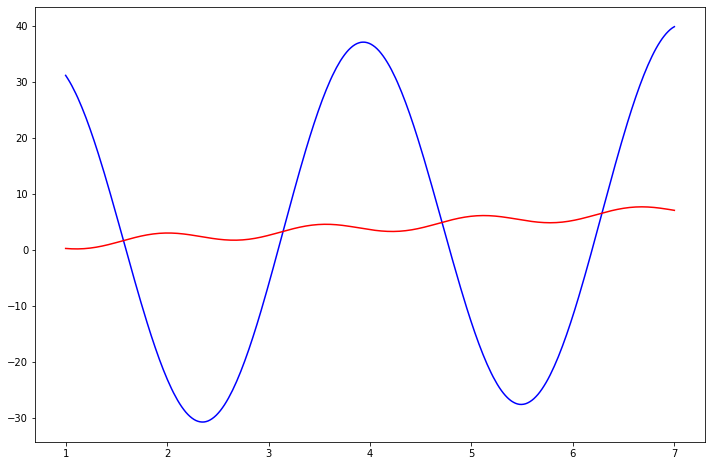

In [161]:
for m in ('trf', 'dogbox'):
    print(m)
    p_ = randint(0, 10 + 1,2)
    p0=p_
    res = curve_fit(f,x,y, method=m, p0=p0, bounds = (0, 10))
    print(res[0])
    plt.figure(figsize=(12, 8))
    plt.plot(x, y, color='blue')
    plt.plot(x, f(x, res[0][0], res[0][1]), color='red')
    plt.show()

Ввиду отсутствия у методов 'trf' и 'dogbox' дополнительных параметров вывода, нет доступных данных для автоматического отбора оптимальных параметров функции.

#Теория

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c


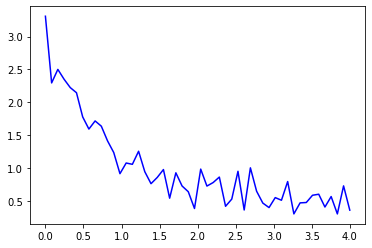

In [9]:
# Define the data to be fit with some noise:

xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b-', label='data')


In [24]:
# Fit for the parameters a, b, c of the function func:

popt, pcov = curve_fit(func, xdata, ydata)
popt, pcov
# array([2.56274217, 1.37268521, 0.47427475])


(array([2.50201201, 1.28871328, 0.5003806 ]),
 array([[ 0.01245235,  0.00502059, -0.00069265],
        [ 0.00502059,  0.01576254,  0.00461479],
        [-0.00069265,  0.00461479,  0.00249507]]))

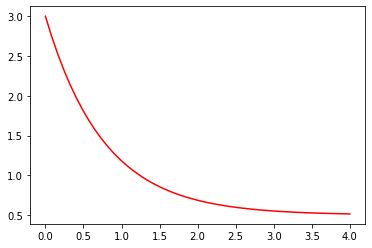

In [11]:
plt.plot(xdata, y#func(xdata, *popt)
        , 'r-',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


In [12]:
# Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:

popt, pcov = curve_fit(func, xdata, ydata, bounds=(0, [3., 1., 0.5]))
popt
# array([2.43736712, 1.        , 0.34463856])


array([2.4146737 , 1.        , 0.39322769])

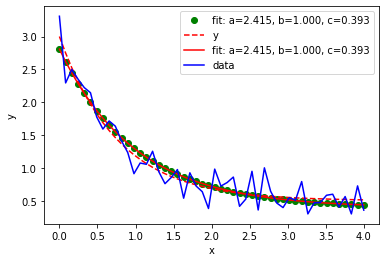

In [23]:
plt.plot(xdata, func(xdata, *popt), 'go',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, y
        , 'r--',
        label='y')
plt.plot(xdata, func(xdata, *popt), 'r-',
        label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata, 'b-', label='data')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()